[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/atmos-cloud-sim-uj/PySDM-examples.git/main?urlpath=PySDM_examples/Lowe_et_al_2019/fig_2.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atmos-cloud-sim-uj/PySDM-examples/blob/main/PySDM_examples/Lowe_et_al_2019/fig_2.ipynb)

#### based on Fig. 2 from Lowe et al. 2019 (Nature Comm.)  "_Key drivers of cloud response to surface-active organics_"   
https://doi.org/10.1038/s41467-019-12982-0

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install atmos-cloud-sim-uj-utils
    from atmos_cloud_sim_uj_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [2]:
from PySDM_examples.Singer_Ward import Settings, Simulation
from PySDM_examples.Singer_Ward.aerosol import AerosolBetaCaryophylleneDark,\
    AerosolBetaCaryophylleneLight, AerosolAlphaPineneDark, AerosolAlphaPineneLight

from atmos_cloud_sim_uj_utils import show_plot
from PySDM.initialisation.sampling import spectral_sampling as spec_sampling
from PySDM.physics import si

import numpy as np
import matplotlib
from matplotlib import pylab

In [3]:
aerosol = AerosolBetaCaryophylleneDark()

output = {}
lines = {'Constant': '-', 'CompressedFilmOvadnevaite': '--', 'CompressedFilmRuehl': ':', 'SzyszkowskiLangmuir': '-.'}
for model in ('Constant', 'CompressedFilmOvadnevaite'):
    key = f"{aerosol.__class__.__name__}-{model}"
    print(key)
    settings = Settings(
        dt=1*si.s, n_sd_per_mode=50, 
        model=model,
        aerosol=aerosol,
        spectral_sampling=spec_sampling.ConstantMultiplicity
    )
    settings.output_interval = 2 * si.s

    simulation = Simulation(settings)
    output[key] = simulation.run()
    output[key]['color'] = aerosol.color
    output[key]['linestyle'] = lines[model]

AerosolBetaCaryophylleneDark-Constant
AerosolBetaCaryophylleneDark-CompressedFilmOvadnevaite


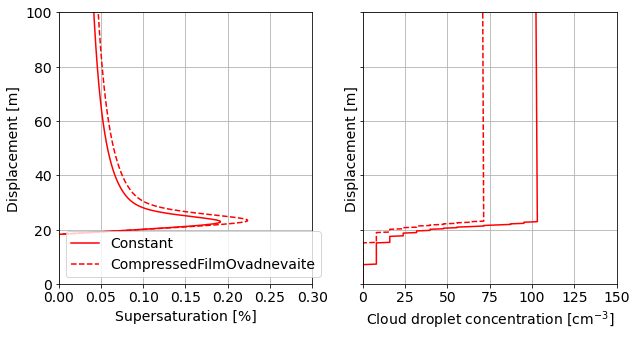

In [4]:
figsize = (10, 5)
pylab.rc('font', size=14)
fig, axs = pylab.subplots(1, 2, figsize=figsize, sharey=True)

dat = np.zeros((len(output[key]['z']), 5))
i = 1

for idx, var in enumerate(('S_max', 'n_c_cm3')):
    for key in output.keys():
        Y = np.asarray(output[key]['z'])
        axs[idx].plot(output[key][var], Y, label=key.split("-")[-1], 
                      color=output[key]['color'],
                      linestyle=output[key]['linestyle']
                     )
        dat[:,0] = Y
        dat[:,i] = output[key][var]
        i += 1
    axs[idx].set_ylim(0, 100)
    
    axs[idx].set_ylabel('Displacement [m]')
    if var == 'S_max':
        axs[idx].set_xlabel('Supersaturation [%]')
        axs[idx].set_xlim(0, 0.3)
    elif var == 'n_c_cm3':
        axs[idx].set_xlabel('Cloud droplet concentration [cm$^{-3}$]')
        axs[idx].set_xlim(0, 150)
    else:
        assert False
    
for ax in axs:
    ax.grid()
axs[0].legend()
pylab.show()

# print(dat)
# np.savetxt("Ryan_parcel.csv", dat, delimiter=',', fmt='%.4f', 
#            header='z (m), SS (bulk), SS (film), CDNC (bulk) (cm-3), CDNC (film) (cm-3)')

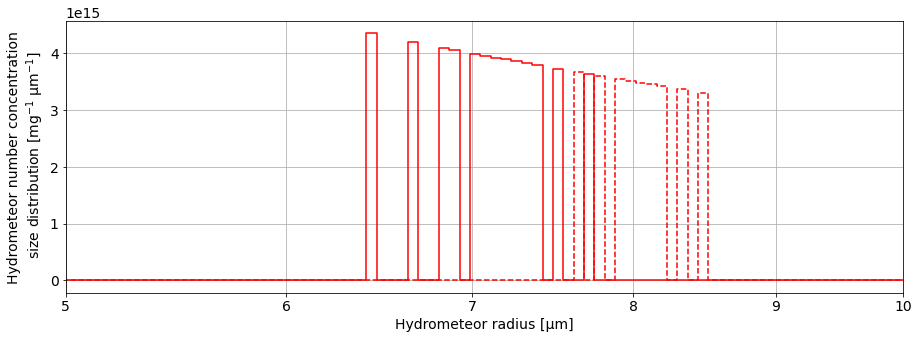

In [5]:
dat = np.zeros((len(settings.wet_radius_bins_edges[:-1]), 3))
dat[:,0] = settings.wet_radius_bins_edges[:-1]
i = 1

record_number = -1
figsize = (15, 5)
pylab.rc('font', size=14)
fig, axs = pylab.subplots(1, 1, figsize=figsize, sharey=True)
for key in output.keys():
    pylab.step(
        settings.wet_radius_bins_edges[:-1] / si.um,
        output[key]['spectrum'],
        label=f'wet ({key})',
        color=output[key]['color'],
        linestyle=output[key]['linestyle'],
        where='pre'
    )
    dat[:,i] = output[key]['spectrum']
    i +=1
pylab.xscale('log')
pylab.grid()
pylab.xlabel("Hydrometeor radius [μm]")
pylab.ylabel("Hydrometeor number concentration\n size distribution [mg$^{-1}$ μm$^{-1}$]")
xticks = (5,6,7,8,9,10)
#xticks = (8,9,10,11,12)
axs.set_xticks(xticks)
axs.set_xlim(xticks[0], xticks[-1])
axs.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
pylab.show()

# print(dat)
# np.savetxt("Ryan_parcel_sizedist.csv", dat, delimiter=',', fmt='%.4e', header='r_wet (m), Nc (bulk), Nc (film)')